<a href="https://colab.research.google.com/github/CristianBR07/Challenge-Telecom-X-Analisis_de_Clientes-ML/blob/main/TelecomX_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [ ]:
df=pd.read_csv('telecomX_ml_ready.csv')

In [ ]:
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Cuentas_Diarias
0,0.0,female,0,1,1,9,1,no,dsl,no,...,0.0,1.0,1.0,0.0,one year,1,mailed check,65.6,593.30,2.186667
1,0.0,male,0,0,0,9,1,yes,dsl,no,...,0.0,0.0,0.0,1.0,month-to-month,0,mailed check,59.9,542.40,1.996667
2,1.0,male,0,0,0,4,1,no,fiber optic,no,...,1.0,0.0,0.0,0.0,month-to-month,1,electronic check,73.9,280.85,2.463333
3,1.0,male,1,1,0,13,1,no,fiber optic,no,...,1.0,0.0,1.0,1.0,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,1.0,female,1,1,0,3,1,no,fiber optic,no,...,0.0,1.0,1.0,0.0,month-to-month,1,mailed check,83.9,267.40,2.796667


In [ ]:
df["Churn"].isna().sum()

np.int64(224)

In [ ]:
df = df.dropna(subset=["Churn"])

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)


Index(['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'Contract', 'PaymentMethod'],
      dtype='object')


In [ ]:
df_encoded = pd.get_dummies(df, columns=['gender', 'MultipleLines', 'InternetService',
                                         'OnlineSecurity', 'Contract', 'PaymentMethod'],
                            drop_first=True)

print(df_encoded.head())


   Churn  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0    0.0              0        1           1       9             1   
1    0.0              0        0           0       9             1   
2    1.0              0        0           0       4             1   
3    1.0              1        1           0      13             1   
4    1.0              1        1           0       3             1   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  ...  \
0           1.0               0.0          1.0          1.0  ...   
1           0.0               0.0          0.0          0.0  ...   
2           0.0               1.0          0.0          0.0  ...   
3           1.0               1.0          0.0          1.0  ...   
4           0.0               0.0          1.0          1.0  ...   

   MultipleLines_yes  InternetService_fiber optic  InternetService_no  \
0              False                        False               False   
1               True    

In [ ]:
df_encoded.gender_male

,gender_male
0,False
1,True
2,True
3,True
4,False
...,...
7262,False
7263,True
7264,True
7265,True


In [ ]:
df["Churn"].value_counts(normalize=True)*100


,proportion
Churn,
0.0,73.463013
1.0,26.536987


In [ ]:
df["Churn"].value_counts()

,count
Churn,
0.0,5174
1.0,1869


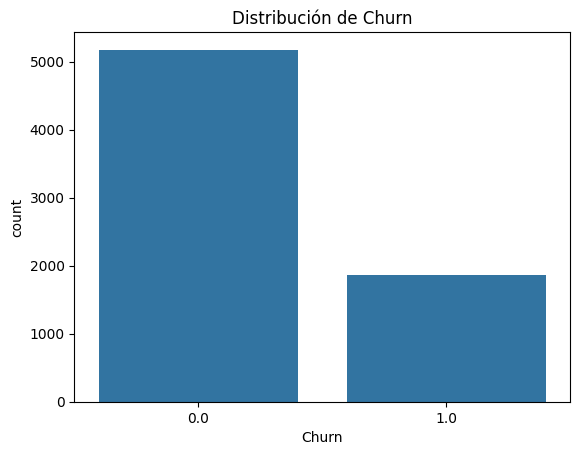

In [ ]:
sns.countplot(x="Churn", data=df)
plt.title("Distribución de Churn")
plt.show()

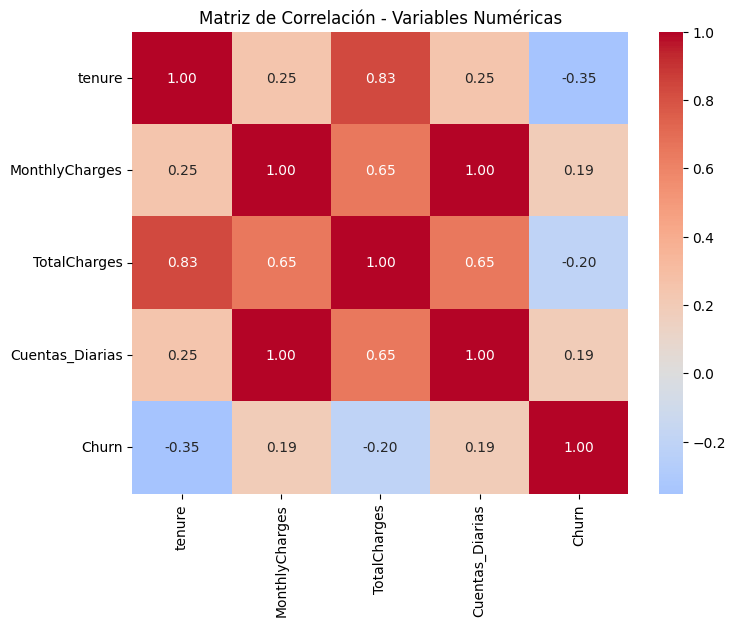

In [ ]:
# Seleccionar solo las numéricas
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Cuentas_Diarias', 'Churn']

# Matriz de correlación
corr = df[num_cols].corr()

# Visualización con heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Matriz de Correlación - Variables Numéricas")
plt.show()


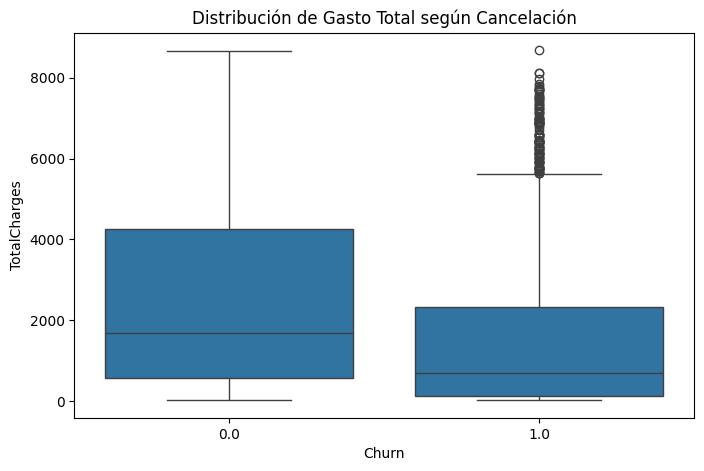

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title("Distribución de Gasto Total según Cancelación")
plt.show()

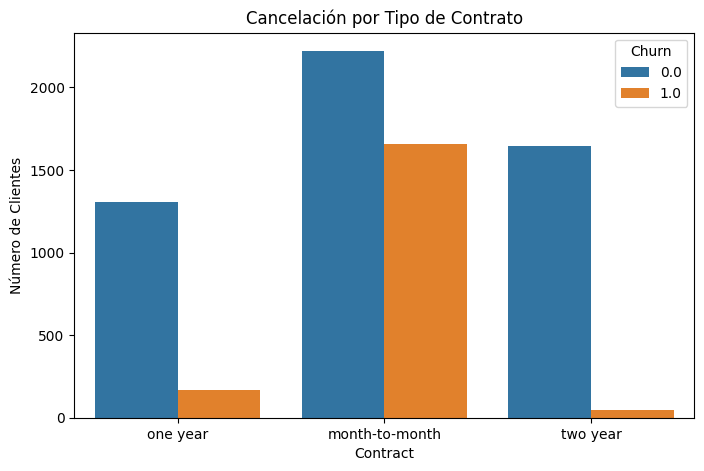

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Cancelación por Tipo de Contrato")
plt.ylabel("Número de Clientes")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X.isna().sum()

,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0
StreamingTV,0
StreamingMovies,0


In [ ]:
df.dtypes

,0
Churn,float64
gender,object
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
X[X.isna().any(axis=1)].head()

In [ ]:
# Eliminar filas con NaN en X o y
X = X.dropna()
y = y.loc[X.index]

In [ ]:
# Modelo 1: Regresión Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predicciones
y_pred_log = log_reg.predict(X_test)
y_proba_log = log_reg.predict_proba(X_test)[:,1]

# Evaluación
print("=== Regresión Logística ===")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_log))

=== Regresión Logística ===
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84      1127
         1.0       0.67      0.57      0.62       527

    accuracy                           0.78      1654
   macro avg       0.74      0.72      0.73      1654
weighted avg       0.77      0.78      0.77      1654

ROC-AUC: 0.8217211148133867


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,MultipleLines_yes,InternetService_fiber optic,InternetService_no,OnlineSecurity_no internet service,OnlineSecurity_yes,Contract_one year,Contract_two year,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Modelo 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

# Evaluación
print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

=== Random Forest ===
              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83      1127
         1.0       0.64      0.50      0.56       527

    accuracy                           0.75      1654
   macro avg       0.71      0.68      0.69      1654
weighted avg       0.74      0.75      0.74      1654

ROC-AUC: 0.7893451910918645


## 📌 Interpretación final

1. Ambos modelos muestran un **desbalance natural**: identifican mucho mejor a clientes que permanecen (0) que a los que cancelan (1).  
   - Esto era esperable porque vimos antes que el dataset tiene más clientes que permanecen (5174) que cancelan (1869).

2. **Regresión Logística**:
   - Más interpretable → permite analizar la importancia de cada variable.  
   - Funcionó mejor en recall y AUC, por lo que es más útil si el objetivo es **detectar a tiempo a clientes con riesgo de cancelar**.  

3. **Random Forest**:
   - Modelo robusto y no necesita normalización.  
   - Tuvo buen desempeño en la clase mayoritaria (no cancelan), pero menor recall en churners.  
   - Puede mejorar si ajustamos hiperparámetros o balanceamos las clases.  

---

## ✅ Conclusión para el challenge

- La **Regresión Logística es el mejor modelo base en este caso**, porque logra un mejor balance entre precisión y recall para detectar cancelaciones, además de un mejor ROC-AUC.  
- Sin embargo, los resultados muestran que el **recall en churners sigue bajo (57%)**, lo cual significa que casi la mitad de los clientes que cancelan **no están siendo detectados**.  
- Para mejorar, podríamos:  
  1. Aplicar **técnicas de balanceo** (SMOTE, oversampling/undersampling).  
  2. Hacer **ingeniería de features** (ejemplo: crear variables de uso promedio mensual, antigüedad categorizada).  
  3. Optimizar hiperparámetros en Random Forest o probar modelos como **XGBoost**.  
